In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     

2023-04-08 13:32:24.910320: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-08 13:32:25.252321: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-08 13:32:25.255398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 13:32:26.321195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [24]:
base_dir = './'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_battery_dir = os.path.join(train_dir, 'battery')

# Directory with our training dog pictures
train_sensor_dir = os.path.join(train_dir, 'sensor')

# Directory with our training dog pictures
train_pump_dir = os.path.join(train_dir, 'pump')

# Directory with our training dog pictures
train_reg_dir = os.path.join(train_dir, 'regulator')


# Directory with our training cat pictures
val_battery_dir = os.path.join(validation_dir, 'battery')

# Directory with our training dog pictures
val_sensor_dir = os.path.join(validation_dir, 'sensor')

# Directory with our training dog pictures
val_pump_dir = os.path.join(validation_dir, 'pump')

# Directory with our training dog pictures
val_reg_dir = os.path.join(validation_dir, 'regulator')

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [21]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.2,
                                   rotation_range=90,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest',
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.2,
                                   rotation_range=90,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest',
                                   zoom_range=0.2)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),  # All images will be resized to 150x150
                                                    batch_size=16,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150, 150),  # All images will be resized to 150x15
                                                         batch_size=8,
                                                         class_mode='binary')


Found 1099 images belonging to 4 classes.
Found 97 images belonging to 4 classes.


In [31]:
history = model.fit(
      train_generator,
      steps_per_epoch=64,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/50


2023-04-08 14:00:05.048645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


64/64 [==============================] - 20s 305ms/step - loss: 0.6552 - accuracy: 0.6895 - val_loss: 0.7258 - val_accuracy: 0.6289
Epoch 2/50
64/64 [==============================] - 22s 340ms/step - loss: 0.6096 - accuracy: 0.7095 - val_loss: 0.6745 - val_accuracy: 0.6804
Epoch 3/50
64/64 [==============================] - 23s 356ms/step - loss: 0.5848 - accuracy: 0.7252 - val_loss: 0.7077 - val_accuracy: 0.6289
Epoch 4/50
64/64 [==============================] - 18s 277ms/step - loss: 0.5746 - accuracy: 0.7291 - val_loss: 0.8905 - val_accuracy: 0.5876
Epoch 5/50
64/64 [==============================] - 18s 288ms/step - loss: 0.5819 - accuracy: 0.7350 - val_loss: 0.6843 - val_accuracy: 0.6907
Epoch 6/50
64/64 [==============================] - 19s 290ms/step - loss: 0.5268 - accuracy: 0.7586 - val_loss: 0.7047 - val_accuracy: 0.7010
Epoch 7/50
64/64 [==============================] - 20s 307ms/step - loss: 0.5325 - accuracy: 0.7586 - val_loss: 0.7526 - val_accuracy: 0.6392
Epoch 8/50

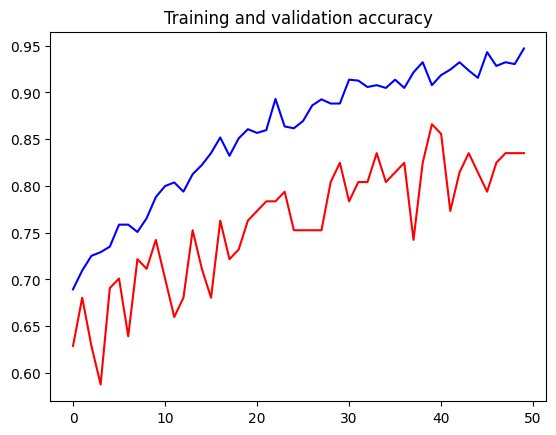

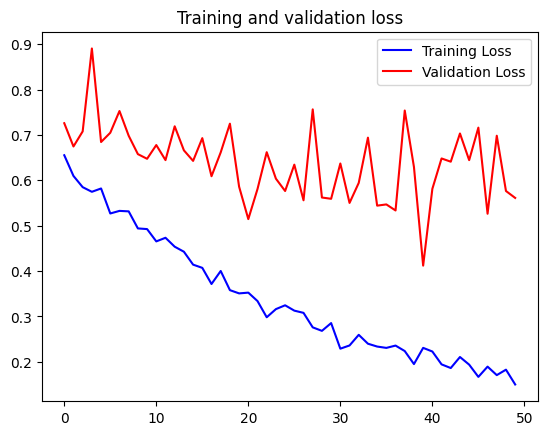

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()